# Homework #2

**See Canvas for HW #2 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

### Problem A.1


**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors will play an important role for us in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j X_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $X_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable (often assumed to be $N(0, \sigma^2)$). 
5. $\beta_j$ are *unknown parameters* of the model, ($j = 0,...,p$). We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### (a)  Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. (This is more LaTeX practice than anything else...)


$\textbf{Y} = \boldsymbol{\beta} \times \textbf{X} + \boldsymbol{\epsilon}$

#### (b) In class, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. 


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 
2. What does this condition mean in practical terms? 
3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?
4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?




1. in order for $(\boldsymbol{X^{T}X})$ to be a valid opperation $\textbf{X}$ must be a matrix k X n and the rank of $\boldsymbol{X}$, k, must be k = n ie $\textbf{X}$ is non-singular and can be put into RREF such that it becomes a diagonal matrix

2. in practice this means that we need at least one more measurement than the number of parameters because otherwise the system will be underspecified. Each measurement takes away at most 1 degree of freedom, and in practice some measurements may be a linear combination of others so significantly more measurements than parameters may be needed.

3. This means that the Gram matrix will be underspecified and we will never be able to solve for it's inverse. In practice this puts lower bounds on the number of IID samples we will need for our models, espcially multiple linear regression with a large $\beta$ matrix.

4. That one or more of the $\beta$'s is non-identifiable

## Problem A.2

In class, we defined the *hat* or *projection* matrix as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. We will do it in steps, and *some* of the proofs will only be required for STAT 5010 students. Note that STAT 4010 students are asked to answer part (e), as to why this result has practical importance.

#### (a) Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.

When solving for $\hat{\beta}$ we showed that $\hat{\beta} = (X \times X^{T})^{-1} \times X^{T} \times Y$

our model states that $\hat{Y} = X \times \hat{\beta}$

Then plugging in for $\hat{\beta}$ we find $\hat{Y} = (X \times (X^{T} \times X)^{-1} \times X^{T}) \times Y = H \times Y$

#### (b) Show that $H$ is symmetric: $H = H^T$.

First: $[(X^{T}X)^{-1}]^{T} = [(X^{T}X){T}]^{-1} = (X^{T}X)^{-1}$ <br>
Then: $H^{T} = [X(X^{T}X)^{-1}X^{T}]^{T} = X[(X^{T}X)^{-1}]^{T}X^{T} = X(X^{T}X)^{-1}X^{T} = H$

#### (c) (STAT 5010 Only) Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.

#### (d) (STAT 5010 Only) Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal.\* That is, we need to show that their dot product is zero:

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ **Prove this result.**

\*It's intersting to think about why uncorrelated, in this case, is equivalent to orthogonal. Extra credit if you can tell me why!

#### (e) Why is this result important in the practical use of linear regression?

## B. Computational Problems

### Problem B.1
Let $X_1,...,X_{30} \overset{iid}{\sim}N(1,9)$. The formula for a 90% confidence interval for $\mu$ is 

$$\bar{X} \pm 1.64\frac{\sigma}{\sqrt{n}}.$$

Let's conduct a simulation to confirm the coverage of this confidence interval.

#### (a) Generate $m = 500$ random samples of size $n = 30$ from $N(1,9)$ and calculate the 90% confidence interval for each. Don't print anything.

In [16]:
m = 500;
n = 30;
set.seed(2121);
X = replicate(m, rnorm(n,1,9));
Xbar = colMeans(X);
sigma = apply(X,2,sd);
se = 1.64 / sqrt(n) * sigma;
lb = Xbar - se;
ub = Xbar + se;

#### (b) Estimate the coverage by finding the number of intervals that cover the true mean, and dividing my $m$.

In [17]:
pos = sum((lb<1 & ub>1))
cat(pos/m)

0.868

### Problem B.2

#### (a) Load the "gala" dataset, and describe the variables. 

In [18]:
#library(tidyverse)
gala = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/gala.txt", sep = "\t")

#### (b) Use ggplot() to explore the relationship between the Species variable (response) and Endemics, Elevation, Nearest, and Adjacent (predictor variables). You might do so by creating four separate scatter plots. Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots?

The following objects are masked from gala (pos = 3):

    Adjacent, Area, Elevation, Endemics, Nearest, Scruz, Species

The following objects are masked from gala (pos = 4):

    Adjacent, Area, Elevation, Endemics, Nearest, Scruz, Species



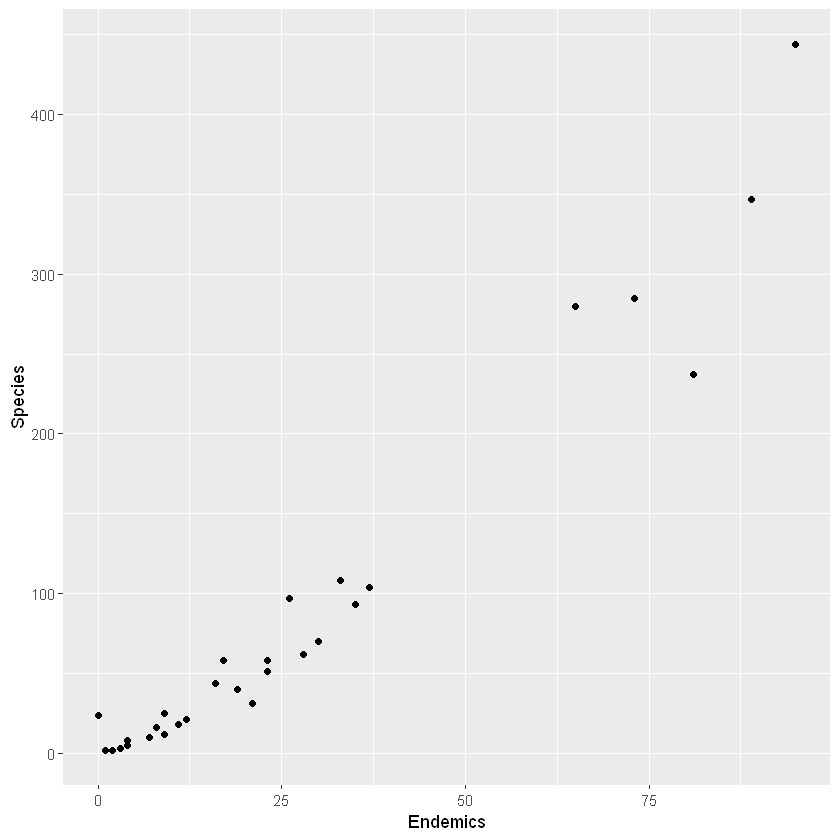

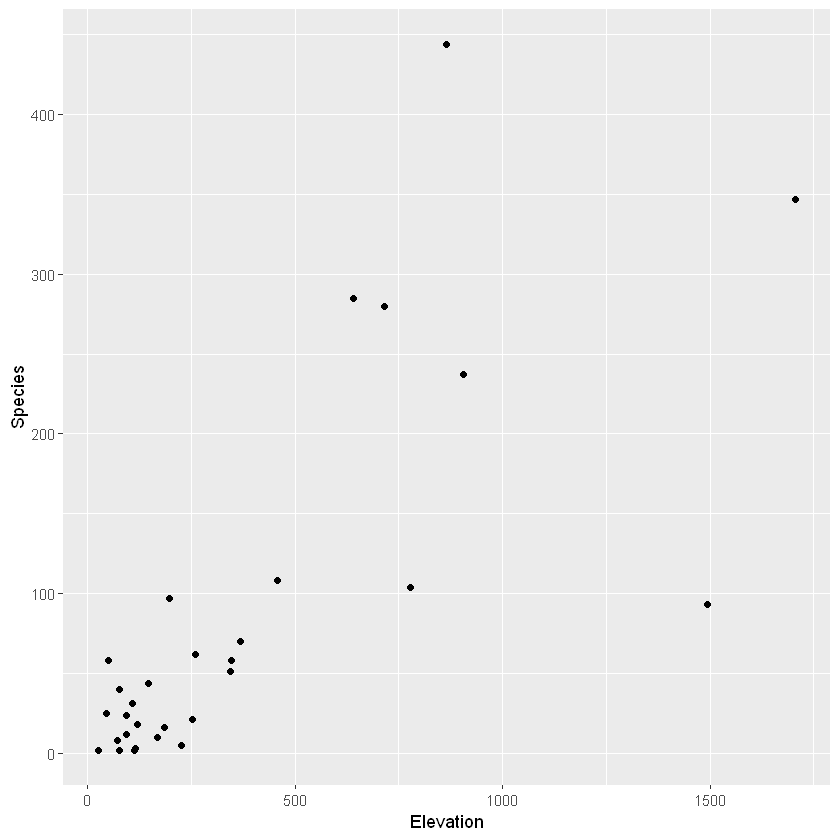

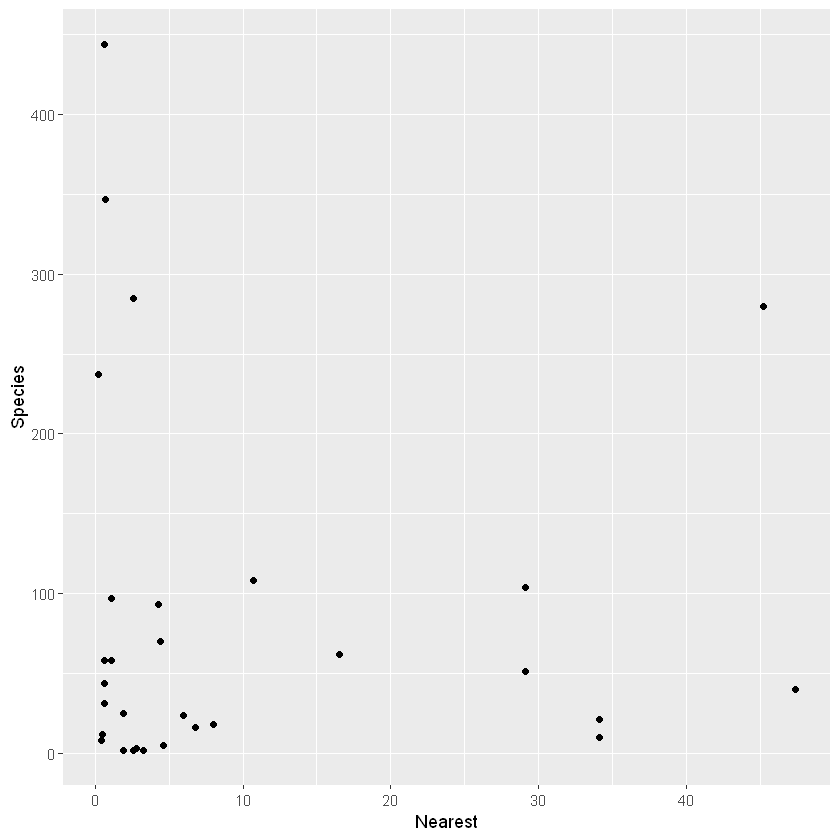

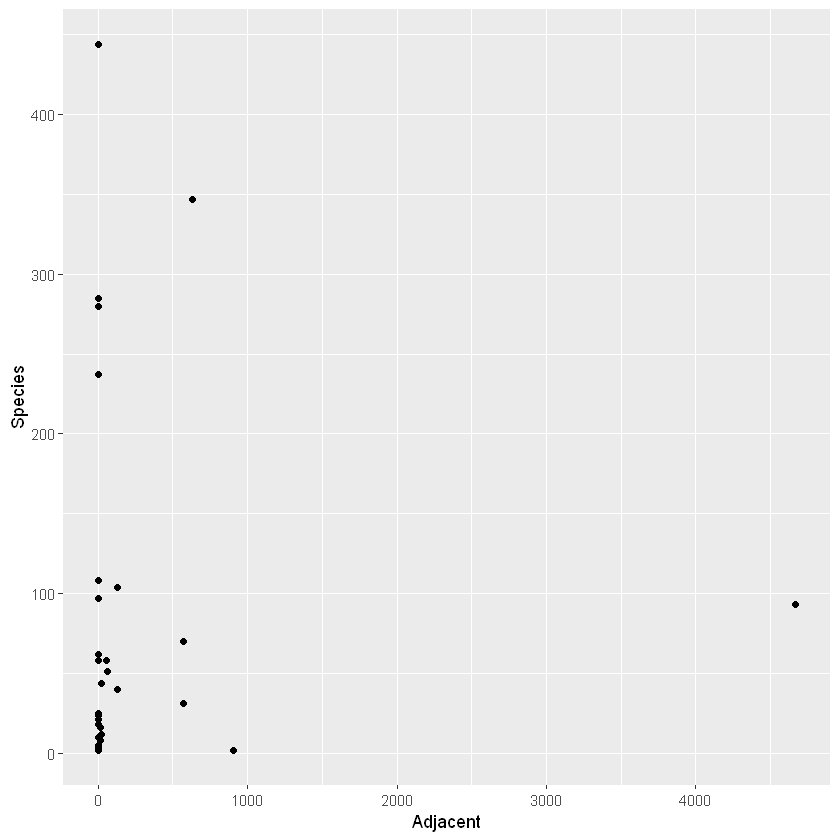

In [19]:
attach(gala)
par(mfrow = c(4,1))
ggplot(gala, aes(x = Endemics, y = Species))+geom_point()
ggplot(gala, aes(x = Elevation, y = Species))+geom_point()
ggplot(gala, aes(x = Nearest, y = Species))+geom_point()
ggplot(gala, aes(x = Adjacent, y = Species))+geom_point()

1. Species vs. Endemics seems to have either a linear relationship or an exponental one with the exponent being slightly greater than 1, There are several outliers which may drag the line of best fit upward for a linear model. The data seems to have constant variance, but the outliers, and absence of data in the middle makes it difficult to tell <br>
2. Species vs. Elevation seems to have a linear relationship but a very noisy one. There are several outliers, and the variance seems to increase with Elevation. <br>
3. Species vs. Nearest does not seem to have a linear relationship. The correlation between the two variables looks to be close to 0, Variance seems to be uniform with respect to Nearest. <br>
4. Species vs. Adjacent does not seem to have a linear relationship. The correlation between the two variables looks to be close to 0, Variance seems to be uniform with respect to Adjacent, there are two outliers that have significantly more species. 

#### (c) Perform a linear regression with Species as the response and Endemics, Elevation, Nearest, and Adjacent as predictors.  Interpret the parameter estimate associated with Endemics (assume, for the moment, that the model is correct, and so the interpretation holds).

In [20]:
model <- lm(Species~Endemics + Elevation + Nearest + Adjacent, data = gala)
summary(model)


Call:
lm(formula = Species ~ Endemics + Elevation + Nearest + Adjacent, 
    data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.232 -10.318   3.412   9.521  70.768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.510039   8.333335  -2.101   0.0459 *  
Endemics      4.192551   0.429056   9.772  5.1e-10 ***
Elevation    -0.008594   0.032903  -0.261   0.7961    
Nearest      -0.203743   0.376472  -0.541   0.5932    
Adjacent     -0.005629   0.009876  -0.570   0.5738    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.59 on 25 degrees of freedom
Multiple R-squared:  0.9464,	Adjusted R-squared:  0.9378 
F-statistic: 110.3 on 4 and 25 DF,  p-value: 1.673e-15


Species has a positive co-variance with Endemics. We have a very small p-value so we can be over 95% confident that the co-variance of Species and Endemics is not 0. Our model estimates that for every increase endemics by one there will be a 4.19 increase in species with a 90% CI being (3.4889, 4.8962).

#### (d) Calculate the residual sum of squares, and the total sum of squares for this model. Then, use these calculations to verify the Multiple R-squared calculation in the summary from the previous part. Interpret $R^2$ (assume, for the moment, that the model is correct, and so the interpretation holds).

In [24]:
resSum = sum(resid(model)^2)
totSum = sum((Species - mean(Species))^2)
rSq = 1 - resSum/totSum
cat("Residual Sum of Squares:" ,resSum, " Total Sum of Squares:" ,totSum, " Multiple R-squared:",rSq)

Residual Sum of Squares: 20428.8  Total Sum of Squares: 381081.4  Multiple R-squared: 0.9463925

$R^{2}$ is the variance in the response variable, Species, that is explained by our model.

#### (e) Plot the residuals vs the fitted values. Based on what we've discussed in class (and a question from Section A of this homework!), what do you expect to see in this plot? Do you see what you expect to see? If not, what does that mean?

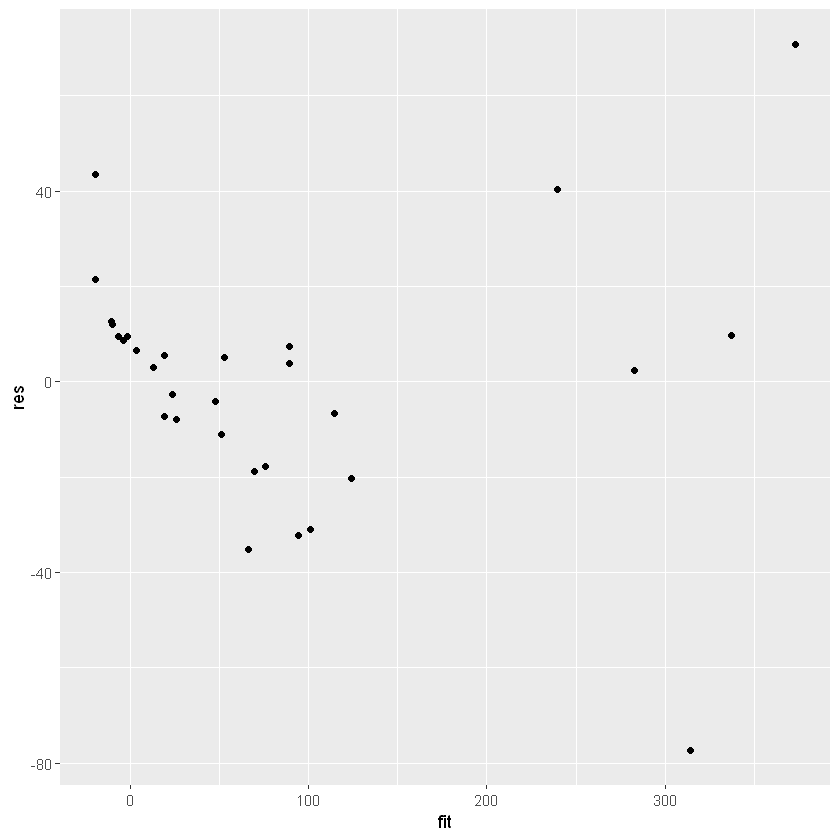

In [51]:
fit = fitted(model)
res = resid(model)
FR = as.data.frame(cbind(fit,res))
ggplot(data = FR, aes(x = fit, y = res))+geom_point()

We expect to see the residuals centered around 0, and to keep the same variance from 0 regardless of the fitted value (homoscedasticity). There is not as much data for the larger fitted values, but the variance does seem to grow larger which would mean that the Gauss-Markov theorem does not hold and a linear model may not be appropiate

### Problem B.3 (STAT 5010 Only)
**Here's a procedure for calculating a two-sample bootstrap hypothesis test. You will apply this procedure on real data below.**

Let $X_1,...,X_{n_1}$ be an iid sample from population #1, with unknown mean $\mu_1$ and known standard deviation $\sigma_1$, and let $Y_1,...,Y_{n_2}$ be an iid sample from population #2, with unknown mean $\mu_2$ and known standard deviation $\sigma_2$. Suppose we want to conduct a hypothesis test of the sort: $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

The following algorithm has been suggested for a bootstrap test.

1. Calculate the test statistic $$t = \frac{\bar{x} - \bar{y}}{\sqrt{\sigma^2_1\big/n_1 + \sigma^2_2\big/n_2}}$$
 
2. Let $\bar{z}$ be the mean of the combined data sets. Create two new data sets, $x^\prime_1,...,x^\prime_{n_1}$ and $y^\prime_1,...,y^\prime_{n_2}$ that are the original data sets centered at $\bar{z}$.

3. Draw $B$ random bootstrap samples of size $n_1$ from $x^\prime_1,...,x^\prime_{n_1}$ and of size $n_2$ from $y^\prime_1,...,y^\prime_{n_2}$. The result will be two matrices, $x^*$ and $y^*$; $x^*$ will containin columns of bootstrap samples from sample #1, and $y^*$ will contain columns of bootstrap samples from sample #2.

4. Then, for each bootstrap sample pair, calculate 

$$t^* = \frac{\bar{x^*}_j - \bar{y^*}_j}{\sqrt{\sigma^{*^2}_1\big/n_1 + \sigma^{*^2}_2\big/n_2}},$$

where $\bar{x^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #1, and $\bar{y^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #2. $\sigma^{*^2}_1$ and $\sigma^{*^2}_2$ are the corresponding variance estimates of the $j^{th}$ bootstrap sample. $t^*$ will be a vector of length $B$ and will approximate the distribution of the test statistic $t$.
 

5. Estimate the p-value using $$\frac{\text{# of times }\{t^* \ge t \}}{B}.$$ 

**Appling this procedure to real data...**

A tennis club has two systems to measure the speed of a tennis ball. The local tennis pros suspect one system, ${\tt speed1}$, is consistently recording faster speeds. To test her suspicions, she sets up both systems and records the speed of 12 serves (three serves from each side of the court). The values are stored in the data frame ${\tt tennis}$, with variables ${\tt speed1}$ and ${\tt speed2}$. The recorded speeds are in kilometers per hour.


#### Does the evidence support the tennis pro's suspicion? Use the above bootstrap hypothesis testing procedure and $\alpha = 0.1$. 

In [9]:
tennis = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/tennis.txt", sep = "\t")